<div style="text-align:right">Justine Charrel - Master 2 Internship</div>
This script plot the monthly serie of low, mid, high and total cloud cover for CALIPSO-GOCCP and for LMDZ6A, on southern ocean, east antarctic continent, west antarctic continent and full antarctic continent.

### IMPORT

In [28]:
import netCDF4
import matplotlib.pyplot as plt
import numpy as np

### READ DATA

In [29]:
# CALIPSO-GOCCP
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/CALIPSO/'
ncfile_obs=path+"CALIPSO_2DCloudCover_seasonal_2008-2022_CFMIP2_sat_3.1.4_r144x90.nc"
nc_obs = netCDF4.Dataset(ncfile_obs)

In [30]:
# MASK
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_mask=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmth_phis_r144x90.nc"
nc_mask = netCDF4.Dataset(ncfile_mask)

In [31]:
# LMDZ6A
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_lmdz6a=path+'LmdzOr6Actrl_calipso_r144x90.nc'
nc_lmdz6a = netCDF4.Dataset(ncfile_lmdz6a)

In [32]:
# DYNAMICO 
# path = '/home/jcharrel/Documents/stage_M2/data/DYNAMICO/'
# ncfile_dynamico_clh=path+'DYNAMICO_clh_seasonal_averaged_concatenated_2000_2014_r144x90.nc'
# nc_dynamico_clh =netCDF4.Dataset(ncfile_dynamico_clh)
# ncfile_dynamico_clh_VHR = path+'DYNAMICO_clhcalipso_VHR_seasonal_averaged_concatenated_2000_2014_r144x90.nc'
# nc_dynamico_clh_VHR =netCDF4.Dataset(ncfile_dynamico_clh_VHR)

In [33]:
# GRID
lon = nc_obs.variables['lon'][:]
lat = nc_obs.variables['lat'][:]

lat_austral = lat[lat <= -30]
lat_antarctica = lat[lat <= -60]

lat_id_austral = lat <= -30
lat_id_antarctica = lat <= -60

lon[lon > 180] -= 360
lon_id = np.argsort(lon)
lon = lon[lon_id]

lon_east = lon[lon>=0]
lon_id_east = lon >= 0

lon_west = lon[lon<=0]
lon_id_west = lon <= 0

### LOAD VARIABLES

In [42]:
# GEOPOTENTIAL FOR MASK
g = 9.81 # m/s
alt_austral = nc_mask.variables['phis'][:,lat_id_austral,lon_id]/g #m
alt_antarctica = nc_mask.variables['phis'][:,lat_id_antarctica,lon_id]/g #m
alt_antarctica_est = alt_antarctica[:,:,lon_id_east]
alt_antarctica_west = alt_antarctica[:,:,lon_id_west]

In [43]:
# MASK
mask_antarctica = np.where(alt_austral > 0.1, 1, np.nan) #pour masquer la partie antarctique
mask_austral = np.where(alt_antarctica <  0.1, 1, np.nan) #pour masquer la partie océan austral
mask_austral_east = np.where(alt_antarctica_est <  0.1, 1, np.nan) #pour masquer la partie océan austral
mask_austral_west = np.where(alt_antarctica_west <  0.1, 1, np.nan) #pour masquer la partie océan austral

In [44]:
# CALIPSO-GOCCP
# AUSTRAL
cllobs_austral = nc_obs.variables['cllcalipso'][:,lat_id_austral,lon_id]
clmobs_austral = nc_obs.variables['clmcalipso'][:,lat_id_austral,lon_id]
clhobs_austral = nc_obs.variables['clhcalipso'][:,lat_id_austral,lon_id]
cltobs_austral = nc_obs.variables['cltcalipso'][:,lat_id_austral,lon_id]
# ANTARCTICA
cllobs_antarctica = nc_obs.variables['cllcalipso'][:,lat_id_antarctica,lon_id]
clmobs_antarctica = nc_obs.variables['clmcalipso'][:,lat_id_antarctica,lon_id]
clhobs_antarctica = nc_obs.variables['clhcalipso'][:,lat_id_antarctica,lon_id]
cltobs_antarctica = nc_obs.variables['cltcalipso'][:,lat_id_antarctica,lon_id]

# LMDZ6A
# AUSTRAL
clllmdz6a_austral = nc_lmdz6a.variables['cllcalipso'][:,lat_id_austral,lon_id]
clmlmdz6a_austral = nc_lmdz6a.variables['clmcalipso'][:,lat_id_austral,lon_id]
clhlmdz6a_austral = nc_lmdz6a.variables['clhcalipso'][:,lat_id_austral,lon_id]
cltlmdz6a_austral = nc_lmdz6a.variables['cltcalipso'][:,lat_id_austral,lon_id]
# ANTARCTICA
clllmdz6a_antarctica = nc_lmdz6a.variables['cllcalipso'][:,lat_id_antarctica,lon_id]
clmlmdz6a_antarctica = nc_lmdz6a.variables['clmcalipso'][:,lat_id_antarctica,lon_id]
clhlmdz6a_antarctica = nc_lmdz6a.variables['clhcalipso'][:,lat_id_antarctica,lon_id]
cltlmdz6a_antarctica = nc_lmdz6a.variables['cltcalipso'][:,lat_id_antarctica,lon_id]

# VARIABLE - DYNAMICO
# ANTARCTICA
# clhdynamico_antarctica = nc_dynamico_clh.variables['clhcalipso'][:,lat_id_antarctica,:]
# clhdynamicoVHR_antarctica = nc_dynamico_clh_VHR.variables['clhcalipso'][:,lat_id_antarctica,:]

In [45]:
# CALIPSO-GOCCP
# ANTARCTICA
cllobs_antarctica_east = cllobs_antarctica[:,:,lon_id_east]
clmobs_antarctica_east = clmobs_antarctica[:,:,lon_id_east]
clhobs_antarctica_east = clhobs_antarctica[:,:,lon_id_east]
cltobs_antarctica_east = cltobs_antarctica[:,:,lon_id_east]

# LMDZ6A
# ANTARCTICA
clllmdz6a_antarctica_east = clllmdz6a_antarctica[:,:,lon_id_east]
clmlmdz6a_antarctica_east = clmlmdz6a_antarctica[:,:,lon_id_east]
clhlmdz6a_antarctica_east = clhlmdz6a_antarctica[:,:,lon_id_east]
cltlmdz6a_antarctica_east = cltlmdz6a_antarctica[:,:,lon_id_east]

In [46]:
# CALIPSO-GOCCP
# ANTARCTICA
cllobs_antarctica_west = cllobs_antarctica[:,:,lon_id_west]
clmobs_antarctica_west = clmobs_antarctica[:,:,lon_id_west]
clhobs_antarctica_west = clhobs_antarctica[:,:,lon_id_west]
cltobs_antarctica_west = cltobs_antarctica[:,:,lon_id_west]

# LMDZ6A
# ANTARCTICA
clllmdz6a_antarctica_west = clllmdz6a_antarctica[:,:,lon_id_west]
clmlmdz6a_antarctica_west = clmlmdz6a_antarctica[:,:,lon_id_west]
clhlmdz6a_antarctica_west = clhlmdz6a_antarctica[:,:,lon_id_west]
cltlmdz6a_antarctica_west = cltlmdz6a_antarctica[:,:,lon_id_west]

In [47]:
# MASK CALIPSO-GOCCP
# AUSTRAL
cllobs_austral = np.ma.masked_where(mask_antarctica >=0, cllobs_austral)
clmobs_austral = np.ma.masked_where(mask_antarctica >=0, clmobs_austral)
clhobs_austral = np.ma.masked_where(mask_antarctica >=0, clhobs_austral)
cltobs_austral = np.ma.masked_where(mask_antarctica >=0, cltobs_austral)
# ANTARCTICA
cllobs_antarctica = np.ma.masked_where(mask_austral >=0, cllobs_antarctica)
clmobs_antarctica = np.ma.masked_where(mask_austral >=0, clmobs_antarctica)
clhobs_antarctica = np.ma.masked_where(mask_austral >=0, clhobs_antarctica)
cltobs_antarctica = np.ma.masked_where(mask_austral >=0, cltobs_antarctica)

# MASK LMDZ6A
# AUSTRAL
clllmdz6a_austral = np.ma.masked_where(mask_antarctica >=0, clllmdz6a_austral)
clmlmdz6a_austral = np.ma.masked_where(mask_antarctica >=0, clmlmdz6a_austral)
clhlmdz6a_austral = np.ma.masked_where(mask_antarctica >=0, clhlmdz6a_austral)
cltlmdz6a_austral = np.ma.masked_where(mask_antarctica >=0, cltlmdz6a_austral)
# ANTARCTICA
clllmdz6a_antarctica = np.ma.masked_where(mask_austral >=0, clllmdz6a_antarctica)
clmlmdz6a_antarctica = np.ma.masked_where(mask_austral >=0, clmlmdz6a_antarctica)
clhlmdz6a_antarctica = np.ma.masked_where(mask_austral >=0, clhlmdz6a_antarctica)
cltlmdz6a_antarctica = np.ma.masked_where(mask_austral >=0, cltlmdz6a_antarctica)

# MASK DYNAMICO
# ANTARCTICA
# clhdynamico_antarctica = np.ma.masked_where(mask_austral>=0, clhdynamico_antarctica)
# clhdynamicoVHR_antarctica = np.ma.masked_where(mask_austral>=0, clhdynamicoVHR_antarctica)

In [48]:
# MASK CALIPSO-GOCCP
# ANTARCTICA
cllobs_antarctica_east = np.ma.masked_where(mask_austral_east >=0, cllobs_antarctica_east)
clmobs_antarctica_east = np.ma.masked_where(mask_austral_east >=0, clmobs_antarctica_east)
clhobs_antarctica_east = np.ma.masked_where(mask_austral_east >=0, clhobs_antarctica_east)
cltobs_antarctica_east = np.ma.masked_where(mask_austral_east >=0, cltobs_antarctica_east)

# MASK LMDZ6A
# ANTARCTICA
clllmdz6a_antarctica_east = np.ma.masked_where(mask_austral_east >=0, clllmdz6a_antarctica_east)
clmlmdz6a_antarctica_east = np.ma.masked_where(mask_austral_east >=0, clmlmdz6a_antarctica_east)
clhlmdz6a_antarctica_east = np.ma.masked_where(mask_austral_east >=0, clhlmdz6a_antarctica_east)
cltlmdz6a_antarctica_east = np.ma.masked_where(mask_austral_east >=0, cltlmdz6a_antarctica_east)

In [49]:
# MASK CALIPSO-GOCCP
# ANTARCTICA
cllobs_antarctica_west = np.ma.masked_where(mask_austral_west >=0, cllobs_antarctica_west)
clmobs_antarctica_west = np.ma.masked_where(mask_austral_west >=0, clmobs_antarctica_west)
clhobs_antarctica_west = np.ma.masked_where(mask_austral_west >=0, clhobs_antarctica_west)
cltobs_antarctica_west = np.ma.masked_where(mask_austral_west >=0, cltobs_antarctica_west)

# MASK LMDZ6A
# ANTARCTICA
clllmdz6a_antarctica_west = np.ma.masked_where(mask_austral_west >=0, clllmdz6a_antarctica_west)
clmlmdz6a_antarctica_west = np.ma.masked_where(mask_austral_west >=0, clmlmdz6a_antarctica_west)
clhlmdz6a_antarctica_west = np.ma.masked_where(mask_austral_west >=0, clhlmdz6a_antarctica_west)
cltlmdz6a_antarctica_west = np.ma.masked_where(mask_austral_west >=0, cltlmdz6a_antarctica_west)

In [50]:
# MASK LMDZ6A WHERE THERE IS NO OBS DATA
mask_lat_obs_antarctica_cll = np.where(cllobs_antarctica.mask == True, 1, np.nan)
mask_lat_obs_antarctica_clm = np.where(clmobs_antarctica.mask == True, 1, np.nan)
mask_lat_obs_antarctica_clh = np.where(clhobs_antarctica.mask == True, 1, np.nan)
mask_lat_obs_antarctica_clt = np.where(cltobs_antarctica.mask == True, 1, np.nan)

clllmdz6a_antarctica = np.ma.masked_where(mask_lat_obs_antarctica_cll >=0, clllmdz6a_antarctica)
clmlmdz6a_antarctica = np.ma.masked_where(mask_lat_obs_antarctica_clm >=0, clmlmdz6a_antarctica)
clhlmdz6a_antarctica = np.ma.masked_where(mask_lat_obs_antarctica_clh >=0, clhlmdz6a_antarctica)
cltlmdz6a_antarctica = np.ma.masked_where(mask_lat_obs_antarctica_clt >=0, cltlmdz6a_antarctica)

In [51]:
# MASK LMDZ6A WHERE THERE IS NO OBS DATA
mask_lat_obs_antarctica_cll_east = np.where(cllobs_antarctica_east.mask == True, 1, np.nan)
mask_lat_obs_antarctica_clm_east = np.where(clmobs_antarctica_east.mask == True, 1, np.nan)
mask_lat_obs_antarctica_clh_east = np.where(clhobs_antarctica_east.mask == True, 1, np.nan)
mask_lat_obs_antarctica_clt_east = np.where(cltobs_antarctica_east.mask == True, 1, np.nan)

clllmdz6a_antarctica_east = np.ma.masked_where(mask_lat_obs_antarctica_cll_east >=0, clllmdz6a_antarctica_east)
clmlmdz6a_antarctica_east = np.ma.masked_where(mask_lat_obs_antarctica_clm_east >=0, clmlmdz6a_antarctica_east)
clhlmdz6a_antarctica_east = np.ma.masked_where(mask_lat_obs_antarctica_clh_east >=0, clhlmdz6a_antarctica_east)
cltlmdz6a_antarctica_east = np.ma.masked_where(mask_lat_obs_antarctica_clt_east >=0, cltlmdz6a_antarctica_east)

In [52]:
# MASK LMDZ6A WHERE THERE IS NO OBS DATA
mask_lat_obs_antarctica_cll_west = np.where(cllobs_antarctica_west.mask == True, 1, np.nan)
mask_lat_obs_antarctica_clm_west = np.where(clmobs_antarctica_west.mask == True, 1, np.nan)
mask_lat_obs_antarctica_clh_west = np.where(clhobs_antarctica_west.mask == True, 1, np.nan)
mask_lat_obs_antarctica_clt_west = np.where(cltobs_antarctica_west.mask == True, 1, np.nan)

clllmdz6a_antarctica_west = np.ma.masked_where(mask_lat_obs_antarctica_cll_west >=0, clllmdz6a_antarctica_west)
clmlmdz6a_antarctica_west = np.ma.masked_where(mask_lat_obs_antarctica_clm_west >=0, clmlmdz6a_antarctica_west)
clhlmdz6a_antarctica_west = np.ma.masked_where(mask_lat_obs_antarctica_clh_west >=0, clhlmdz6a_antarctica_west)
cltlmdz6a_antarctica_west = np.ma.masked_where(mask_lat_obs_antarctica_clt_west >=0, cltlmdz6a_antarctica_west)

In [53]:
# AREA MEAN - CALIPSO-GOCCP
# AUSTRAL
cllobs_austral = np.mean(cllobs_austral, axis=(1,2))
clmobs_austral = np.mean(clmobs_austral, axis=(1,2))
clhobs_austral = np.mean(clhobs_austral, axis=(1,2))
cltobs_austral = np.mean(cltobs_austral, axis=(1,2))
obs_austral = np.dstack((cllobs_austral,clmobs_austral,clhobs_austral,cltobs_austral))
# ANTARCTICA
cllobs_antarctica = np.mean(cllobs_antarctica, axis=(1,2))
clmobs_antarctica = np.mean(clmobs_antarctica, axis=(1,2))
clhobs_antarctica = np.mean(clhobs_antarctica, axis=(1,2))
cltobs_antarctica = np.mean(cltobs_antarctica, axis=(1,2))
obs_antarctica = np.dstack((cllobs_antarctica,clmobs_antarctica,clhobs_antarctica,cltobs_antarctica))

# AREA MEAN - LMDZ6A
# AUSTRAL
clllmdz6a_austral = np.mean(clllmdz6a_austral, axis=(1,2))
clmlmdz6a_austral = np.mean(clmlmdz6a_austral, axis=(1,2))
clhlmdz6a_austral = np.mean(clhlmdz6a_austral, axis=(1,2))
cltlmdz6a_austral = np.mean(cltlmdz6a_austral, axis=(1,2))
lmdz6a_austral = np.ma.dstack((clllmdz6a_austral,clmlmdz6a_austral,clhlmdz6a_austral,cltlmdz6a_austral))
# ANTARCTICA
clllmdz6a_antarctica = np.mean(clllmdz6a_antarctica, axis=(1,2))
clmlmdz6a_antarctica = np.mean(clmlmdz6a_antarctica, axis=(1,2))
clhlmdz6a_antarctica = np.mean(clhlmdz6a_antarctica, axis=(1,2))
cltlmdz6a_antarctica = np.mean(cltlmdz6a_antarctica, axis=(1,2))
lmdz6a_antarctica = np.ma.dstack((clllmdz6a_antarctica,clmlmdz6a_antarctica,clhlmdz6a_antarctica,cltlmdz6a_antarctica))

# AREA MEAN - DYNAMICO
# ANTARCTICA
# clhdynamico_antarctica = np.mean(clhdynamico_antarctica, axis=(1,2))
# clhdynamicoVHR_antarctica = np.mean(clhdynamicoVHR_antarctica, axis=(1,2))

In [54]:
# AREA MEAN - CALIPSO-GOCCP
# ANTARCTICA
cllobs_antarctica_east = np.mean(cllobs_antarctica_east, axis=(1,2))
clmobs_antarctica_east = np.mean(clmobs_antarctica_east, axis=(1,2))
clhobs_antarctica_east = np.mean(clhobs_antarctica_east, axis=(1,2))
cltobs_antarctica_east = np.mean(cltobs_antarctica_east, axis=(1,2))
obs_antarctica_east = np.dstack((cllobs_antarctica_east,clmobs_antarctica_east,clhobs_antarctica_east,cltobs_antarctica_east))

# AREA MEAN - LMDZ6A
# ANTARCTICA
clllmdz6a_antarctica_east = np.mean(clllmdz6a_antarctica_east, axis=(1,2))
clmlmdz6a_antarctica_east = np.mean(clmlmdz6a_antarctica_east, axis=(1,2))
clhlmdz6a_antarctica_east = np.mean(clhlmdz6a_antarctica_east, axis=(1,2))
cltlmdz6a_antarctica_east = np.mean(cltlmdz6a_antarctica_east, axis=(1,2))
lmdz6a_antarctica_east = np.ma.dstack((clllmdz6a_antarctica_east,clmlmdz6a_antarctica_east,clhlmdz6a_antarctica_east,cltlmdz6a_antarctica_east))

In [55]:
# AREA MEAN - CALIPSO-GOCCP
# ANTARCTICA
cllobs_antarctica_west = np.mean(cllobs_antarctica_west, axis=(1,2))
clmobs_antarctica_west = np.mean(clmobs_antarctica_west, axis=(1,2))
clhobs_antarctica_west = np.mean(clhobs_antarctica_west, axis=(1,2))
cltobs_antarctica_west = np.mean(cltobs_antarctica_west, axis=(1,2))
obs_antarctica_west = np.dstack((cllobs_antarctica_west,clmobs_antarctica_west,clhobs_antarctica_west,cltobs_antarctica_west))

# AREA MEAN - LMDZ6A
# ANTARCTICA
clllmdz6a_antarctica_west = np.mean(clllmdz6a_antarctica_west, axis=(1,2))
clmlmdz6a_antarctica_west = np.mean(clmlmdz6a_antarctica_west, axis=(1,2))
clhlmdz6a_antarctica_west = np.mean(clhlmdz6a_antarctica_west, axis=(1,2))
cltlmdz6a_antarctica_west = np.mean(cltlmdz6a_antarctica_west, axis=(1,2))
lmdz6a_antarctica_west = np.ma.dstack((clllmdz6a_antarctica_west,clmlmdz6a_antarctica_west,clhlmdz6a_antarctica_west,cltlmdz6a_antarctica_west))

### PLOT MONTHLY SERIE

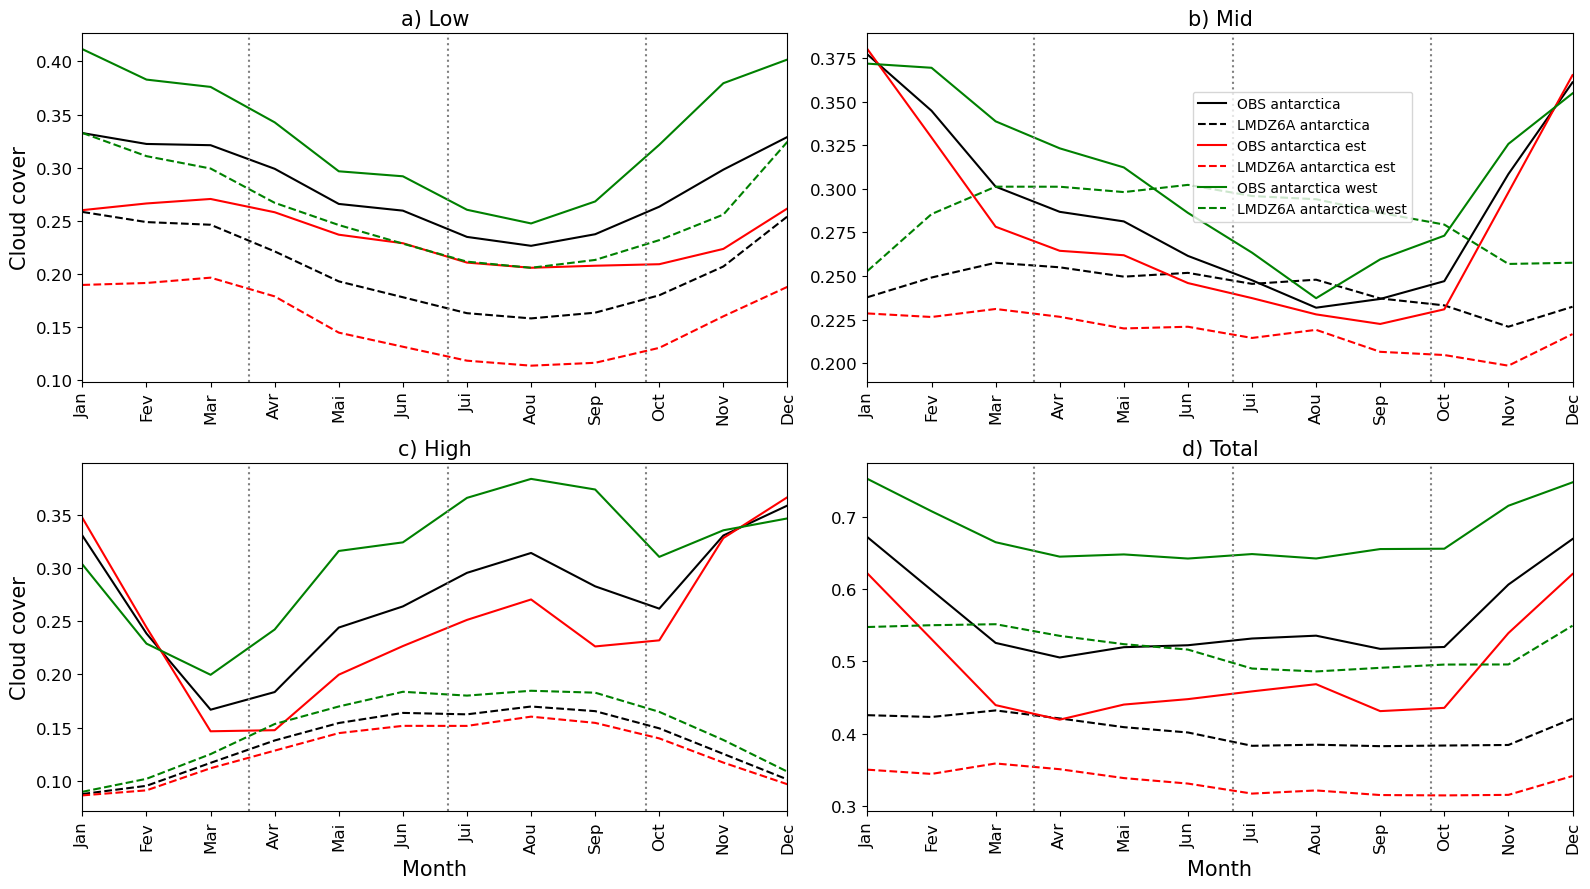

In [61]:
fig, axes = plt.subplots(figsize=(16,9), nrows=2, ncols=2)

months = ['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Jun', 'Jui', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec']
pltcounter = 0
for plotid in axes.flat:
    pltcounter = pltcounter + 1
    if pltcounter == 1:
        plotid.set_title("a) Low", size=15)
        plotid.set_ylabel('Cloud cover', size=15)
    elif pltcounter == 2:
        plotid.set_title("b) Mid", size=15)
    elif pltcounter == 3:
        plotid.set_title("c) High", size=15)
        plotid.set_ylabel('Cloud cover', size=15)
        plotid.set_xlabel('Month', size=15)
        #plotid.plot(months, clhdynamico_antarctica/100, c='r', linestyle=':')
        #plotid.plot(months, clhdynamicoVHR_antarctica/100, c='g', linestyle=':')
    elif pltcounter == 4:
        plotid.set_title("d) Total", size=15)
        plotid.set_xlabel('Month', size=15)

    #OBS
    clobs_austral_plot = obs_austral[0,:,pltcounter-1]
    clobs_antarctica_plot = obs_antarctica[0,:,pltcounter-1]
    clobs_antarctica_east_plot = obs_antarctica_east[0,:,pltcounter-1]
    clobs_antarctica_west_plot = obs_antarctica_west[0,:,pltcounter-1]
    
    #LMDZ6A
    cllmdz6a_austral_plot = lmdz6a_austral[0,:,pltcounter-1]
    cllmdz6a_antarctica_plot = lmdz6a_antarctica[0,:,pltcounter-1]
    cllmdz6a_antarctica_east_plot = lmdz6a_antarctica_east[0,:,pltcounter-1]
    cllmdz6a_antarctica_west_plot = lmdz6a_antarctica_west[0,:,pltcounter-1]
    
    #plotid.plot(months,clobs_austral_plot, c='b', label='OBS austral ocean')
    #plotid.plot(months,cllmdz6a_austral_plot, c='b', linestyle='--', label='LMDZ6A austral ocean')
    plotid.plot(months,clobs_antarctica_plot, c='k', label='OBS antarctica')
    plotid.plot(months,cllmdz6a_antarctica_plot, c='k', linestyle='--', label='LMDZ6A antarctica')

    plotid.plot(months,clobs_antarctica_east_plot, c='r', label='OBS antarctica est')
    plotid.plot(months,cllmdz6a_antarctica_east_plot, c='r', linestyle='--', label='LMDZ6A antarctica est')
    plotid.plot(months,clobs_antarctica_west_plot, c='g', label='OBS antarctica west')
    plotid.plot(months,cllmdz6a_antarctica_west_plot, c='g', linestyle='--', label='LMDZ6A antarctica west')
    
    plotid.set_xticks(months, months, rotation='vertical')
    plotid.set_xlim('Jan', 'Dec')
    plotid.tick_params(axis='both', labelsize=12)

season_boundaries = [2.6, 5.7, 8.8]
def add_season_lines(ax):
    for boundary in season_boundaries:
        ax.axvline(x=boundary, color='gray', linestyle=':')
for plotid in axes.flat:
    add_season_lines(plotid)
    
handles, labels = plotid.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.75,0.75))
fig.tight_layout()
path_fig = '/home/jcharrel/Documents/M2_Internship_LMD/figures/2DCloudCover/monthly_serie/'
plt.savefig(path_fig+'2DCloudCover_monthly_serie_east_west.png',dpi=300)